# **Pricing European Call Option**

## A) Monte Carlo with 30 simulations

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
S0 = 70
K = 65
r=0.02
stdev = 0.3
T = 4 #time to maturity
trading_days = 250 #trading days in a year
daily_step = 1/trading_days
iterations_1 = 30 #_1 is 30 simulations

In [3]:
np.random.seed(503508) #set random seed

In [4]:
Z_1 = np.random.standard_normal(((T*trading_days)+1, iterations_1))
Z_1

array([[-0.82487461, -0.97546241,  0.88384933, ..., -1.54104887,
         0.1070498 , -1.51797381],
       [-0.27858677,  0.87344842, -0.82073884, ...,  0.55624047,
         0.62003532, -0.42283128],
       [-0.79699613, -1.12370122, -1.40704728, ...,  1.81973281,
         1.15088852,  2.01290958],
       ...,
       [-0.25903026, -0.41459449,  0.25729711, ...,  1.03672024,
         2.18371996, -1.06387822],
       [-1.36538685, -0.4694137 , -0.43581642, ..., -0.46131539,
         0.19199881,  1.27630375],
       [-1.10629852,  1.54976265, -0.11050233, ..., -1.07661901,
        -0.86433654, -1.09168743]])

In [5]:
S_1 = np.zeros_like(Z_1)
S_1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
Z_1.shape

(1001, 30)

In [7]:
S_1.shape

(1001, 30)

In [8]:
S_1[0] = S0
S_1

array([[70., 70., 70., ..., 70., 70., 70.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [9]:
for t in range(1,(T*trading_days)+1): #simulating future prices
    S_1[t] = S_1[t-1] * np.exp(((r-(0.5*(stdev**2)))*daily_step) + (stdev*(daily_step**0.5) *Z_1[t]))

In [10]:
S_1

array([[70.        , 70.        , 70.        , ..., 70.        ,
        70.        , 70.        ],
       [69.62400656, 71.16262569, 68.91148241, ..., 70.73561278,
        70.82128457, 69.43371682],
       [68.57221965, 69.65448064, 67.08939423, ..., 73.21323169,
        72.37754935, 72.12962566],
       ...,
       [57.03182854, 78.58758546, 40.79701549, ..., 37.62162715,
        48.32143071, 32.4535967 ],
       [55.56775647, 77.88296432, 40.45700858, ..., 37.29003866,
        48.49293336, 33.24576652],
       [54.4080747 , 80.1990702 , 40.36823686, ..., 36.53237382,
        47.69938242, 32.56096322]])

In [11]:
future_prices_1 = pd.DataFrame(S_1)
future_prices_1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
1,69.624007,71.162626,68.911482,70.010619,72.228492,71.421453,70.629574,71.221696,68.027450,69.614959,...,73.317734,66.103625,70.738073,70.874850,69.013227,68.794327,71.781509,70.735613,70.821285,69.433717
2,68.572220,69.654481,67.089394,70.380418,73.833332,70.160871,71.254261,70.149308,67.337503,68.031396,...,75.413296,68.066818,71.987354,69.748146,69.117227,69.575521,72.342111,73.213232,72.377549,72.129626
3,68.449998,69.783536,64.372861,70.549411,72.109901,71.653696,72.403920,68.931644,66.610086,66.843333,...,76.001878,66.746378,72.075781,67.635347,67.575229,71.556887,70.981340,71.929626,71.606048,69.353162
4,68.613365,71.927111,62.830191,70.671667,72.730591,70.427957,70.813807,69.424333,66.689579,66.970589,...,74.396532,69.203278,72.710317,65.376188,67.539105,73.404441,72.332511,72.563154,72.625590,70.505020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,59.948406,80.004238,40.928580,58.573599,39.221619,81.945916,38.174345,68.190864,129.450569,85.001378,...,29.038985,74.551945,49.672352,28.370579,155.962091,98.145576,125.571845,36.374286,45.897737,32.150616
997,57.318547,79.216144,40.602395,58.824701,39.021821,82.206815,38.012989,69.884721,133.022979,83.831025,...,28.805649,75.058917,48.879008,28.692014,156.492495,99.437378,124.009170,36.892515,46.364867,33.118663
998,57.031829,78.587585,40.797015,58.231462,38.849546,80.923015,37.165321,69.518247,133.645358,82.336329,...,28.368771,75.201689,48.400673,27.810502,156.241706,98.217382,122.725720,37.621627,48.321431,32.453597
999,55.567756,77.882964,40.457009,58.926796,37.953202,81.873944,37.477743,68.251430,133.713991,81.997862,...,28.698137,73.432671,48.435872,28.214017,156.886913,98.459000,122.279078,37.290039,48.492933,33.245767


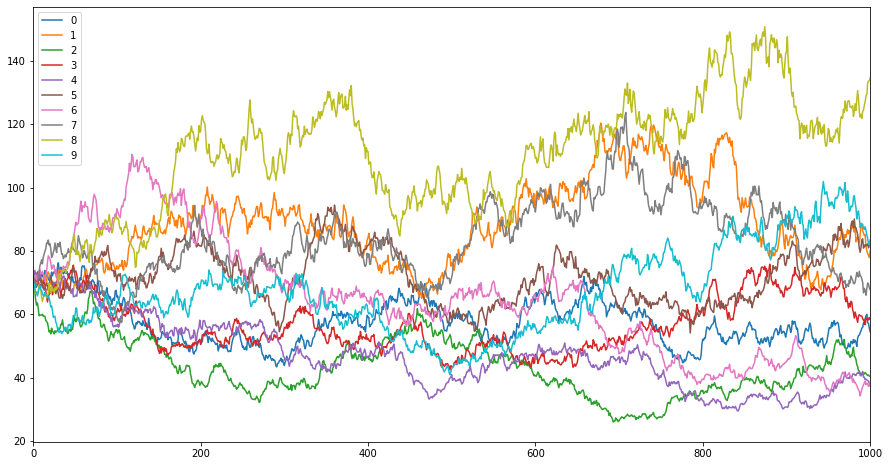

In [12]:
future_prices_1.iloc[:,0:10].plot(figsize=(15,8)) #plot first 10 price simulations from 30 
plt.show()

In [13]:
call_value_1 = np.maximum(S_1[-1]-K,0)
call_value_1 #value of call for each iteration from 30 simulations

array([ 0.        , 15.1990702 ,  0.        ,  0.        ,  0.        ,
       18.01636411,  0.        ,  2.70549238, 69.73610822, 18.51992376,
        1.09670337,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 37.35442318,  0.        ,
        0.        ,  6.5992744 ,  0.        ,  0.        , 93.66002073,
       31.4550396 , 53.6422879 ,  0.        ,  0.        ,  0.        ])

In [14]:
Call_price_1 = (np.exp(-r*T)*np.sum(call_value_1))/iterations_1
Call_price_1 #Price of European Call from 30 simulations

10.70767907013127

## B) Monte Carlo with 3,000 simulations

In [15]:
iterations_2 = 3000 #_2 is 3000 simulations

In [16]:
np.random.seed(503508) #set random seed

In [17]:
Z_2 = np.random.standard_normal(((T*trading_days)+1, iterations_2))
Z_2

array([[-0.82487461, -0.97546241,  0.88384933, ...,  0.20848602,
         1.82073386, -0.57509071],
       [-1.67211351,  0.76456417, -0.13340726, ...,  1.05727897,
         1.00991974,  0.83407278],
       [-0.96408822,  0.37067098,  0.54517843, ..., -1.05824443,
        -2.52109409, -0.23393317],
       ...,
       [-0.30351753,  0.68843211, -0.9611949 , ...,  0.77714465,
         0.21330369,  0.92727011],
       [-0.671051  , -0.34568453,  0.16676245, ..., -0.29423899,
         0.50229526,  0.35769425],
       [-0.89823555, -0.03939239, -1.81099659, ...,  0.18735359,
         1.22945365,  1.68612629]])

In [18]:
S_2 = np.zeros_like(Z_2)
S_2[0] = S0

In [19]:
for t in range(1,(T*trading_days)+1):
    S_2[t] = S_2[t-1] * np.exp(((r-(0.5*(stdev**2)))*daily_step) + (stdev*(daily_step**0.5) *Z_2[t]))

In [20]:
future_prices_2 = pd.DataFrame(S_2)
future_prices_2

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
1,67.807250,71.015760,69.816056,72.023412,69.491167,68.186206,71.865982,68.835489,69.448863,71.238122,...,68.500441,67.704942,69.787799,67.686165,71.360674,71.175350,70.285326,71.411270,71.347130,71.109480
2,66.571518,71.509822,70.534930,69.707041,67.263501,68.262278,73.716323,67.882283,69.499456,72.827075,...,68.299571,66.501720,68.834655,67.536902,70.826305,70.783533,70.910797,69.984719,68.007822,70.787476
3,65.559906,71.214307,70.042930,71.414651,66.742279,70.369728,73.010950,68.568097,68.798391,71.904566,...,69.366036,64.987966,69.459106,66.594315,70.879598,71.495727,70.633693,69.531606,68.822417,71.102269
4,64.901276,71.718275,69.862922,71.948442,67.132447,70.566755,73.227941,67.553662,68.763255,69.537661,...,70.607242,65.408907,69.799951,64.937997,70.565534,69.587491,71.824023,66.732533,69.780860,70.607252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,94.503636,113.132249,250.253267,62.234180,47.518771,29.572693,79.637812,136.087394,118.518059,45.826757,...,134.516236,41.430211,95.870179,99.370750,34.329355,47.634949,31.116549,64.165958,34.963957,118.760136
997,95.627711,112.797067,245.580945,63.446940,48.895268,29.319620,80.359547,135.384408,119.400699,46.497877,...,135.648685,42.730247,100.452335,100.271820,34.834964,48.718502,30.428645,64.465917,34.458281,111.615475
998,95.069081,114.268669,241.118670,64.634655,48.912585,28.326061,80.809066,132.811062,118.158533,45.792782,...,136.450824,42.218794,99.630258,97.569034,34.445878,49.308478,31.450871,65.416986,34.594562,113.585223
999,93.856920,113.510293,241.858613,63.395408,46.879048,28.422791,80.218970,137.355067,113.646463,47.273813,...,137.293578,42.902893,102.203343,96.593451,35.139252,49.347732,30.776061,65.046289,34.922345,114.347286


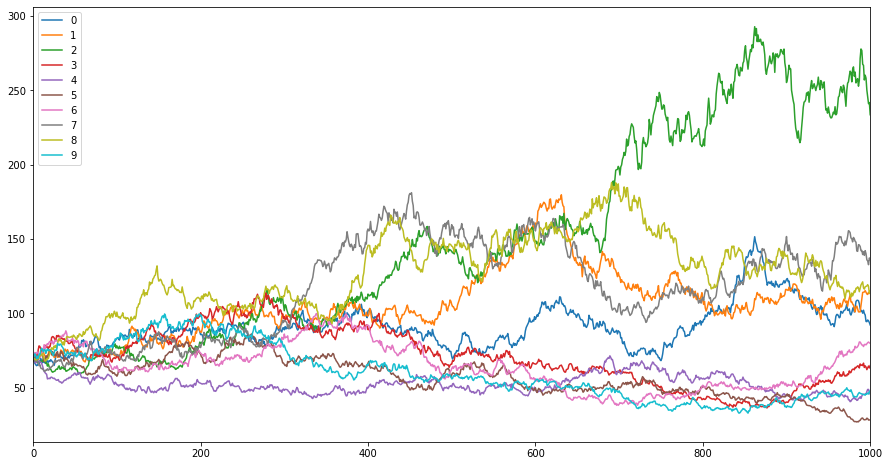

In [21]:
future_prices_2.iloc[:,0:10].plot(figsize=(15,8)) #plotting the first 10 simulations
plt.show()

In [22]:
call_value_2 = np.maximum(S_2[-1]-K,0) #value of call for each iteration from 3000 simulations
Call_price_2 = (np.exp(-r*T)*np.sum(call_value_2))/iterations_2
Call_price_2 #Price of European Call from 3000 simulations

19.63481331277338

## C) Black-Scholes model

In [23]:
from scipy.stats import norm 

In [24]:
#define function for d1
def d1_stock(S,K,r,t,sd):
    return (np.log(S/K)+(r+((sd**2)/2))*t)/(sd*(t**0.5))

In [25]:
#define function for d2
def d2_stock(S,K,r,t,sd):
    return (np.log(S/K)+(r-((sd**2)/2))*t)/(sd*(t**0.5))

In [26]:
#define function for BSM for European call option
def BSM_stock(S,K,r,t,sd):
    return ((S*norm.cdf(d1_stock(S,K,r,t,sd))) - (np.exp(-r*t)*K*norm.cdf(d2_stock(S,K,r,t,sd))))

In [27]:
d1_stock(S=S0, K=K, r=r ,sd=stdev, t=T)

0.5568466202562031

In [28]:
d2_stock(S=S0, K=K, r=r ,sd=stdev, t=T)

-0.04315337974379693

In [29]:
BSM_stock = BSM_stock(S=S0, K=K, r=r ,sd=stdev, t=T)
BSM_stock

20.814256819072327

## D) BSM vs 30simulations

In [30]:
diff_1 = Call_price_1 - BSM_stock
diff_1

-10.106577748941056

In [31]:
pct_diff_1 = diff_1/BSM_stock
print('%error = ',pct_diff_1*100,'%')

%error =  -48.55603462949632 %


## E) BSM vs 3000simulations

In [32]:
diff_2 = Call_price_2 - BSM_stock
diff_2

-1.179443506298945

In [33]:
pct_diff_2 = diff_2/BSM_stock
print('%error = ',pct_diff_2*100,'%')

%error =  -5.666517505531153 %


# Currency European Call Options

## A) Using Monte Carlo

In [37]:
E0 = 0.007 #spot dollar/yen
K_cur = 0.01 #strike
sd_cur = 0.08
r_domestic = 0.04 #dollar risk-free
r_foreign = 0.02 #yen risk-free
T_cur=2 #time to maturity

In [38]:
trade_per_year_cur = 250
delta_t_cur = 1/trade_per_year_cur
days_to_maturity_cur = T_cur*trade_per_year_cur
iterations_cur = 3000

In [39]:
u = r_domestic - r_foreign

In [40]:
#Converting Annualized yield to Daily Yield
u_t = ((1+u)**(1/250))-1
u_t 

7.921364641982898e-05

In [41]:
#Converting Annualized sd to Daily sd
sd_t = sd_cur*((1/250)**0.5)
sd_t

0.005059644256269407

In [42]:
np.random.seed(503508) #set random seed

In [43]:
Z_cur = np.random.standard_normal((days_to_maturity_cur+1, iterations_cur))
Z_cur

array([[-0.82487461, -0.97546241,  0.88384933, ...,  0.20848602,
         1.82073386, -0.57509071],
       [-1.67211351,  0.76456417, -0.13340726, ...,  1.05727897,
         1.00991974,  0.83407278],
       [-0.96408822,  0.37067098,  0.54517843, ..., -1.05824443,
        -2.52109409, -0.23393317],
       ...,
       [ 0.0676142 ,  1.7188212 , -0.08449221, ..., -0.35333664,
        -0.71783318, -0.57345294],
       [-0.08959904, -0.37358199, -0.14758834, ...,  1.95444955,
        -1.14665003, -0.41256143],
       [-2.40197136, -1.0496224 , -0.23604755, ..., -0.01359282,
         0.02734236, -0.57394795]])

In [44]:
S_cur = np.zeros_like(Z_cur)
S_cur

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
Z_cur.shape

(501, 3000)

In [46]:
S_cur.shape

(501, 3000)

In [47]:
S_cur[0] = E0
S_cur

array([[0.007, 0.007, 0.007, ..., 0.007, 0.007, 0.007],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [48]:
for t in range(1,days_to_maturity_cur+1):
    S_cur[t] = S_cur[t-1]*(np.exp(u_t -(0.5*(sd_t**2)) + (sd_t)*Z_cur[t]))

In [49]:
S_cur

array([[0.007     , 0.007     , 0.007     , ..., 0.007     , 0.007     ,
        0.007     ],
       [0.00694149, 0.0070276 , 0.00699574, ..., 0.00703801, 0.00703633,
        0.00703007],
       [0.00690817, 0.00704126, 0.00701553, ..., 0.0070009 , 0.0069476 ,
        0.00702222],
       ...,
       [0.00745738, 0.0082523 , 0.00886775, ..., 0.00741474, 0.00709777,
        0.00730336],
       [0.0074545 , 0.00823726, 0.00886172, ..., 0.00748892, 0.00705718,
        0.00728862],
       [0.00736494, 0.00819418, 0.00885173, ..., 0.00748891, 0.00705863,
        0.00726796]])

In [50]:
future_currency = pd.DataFrame(S_cur)
future_currency

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,...,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000
1,0.006941,0.007028,0.006996,0.007054,0.006987,0.006952,0.007050,0.006969,0.006986,0.007033,...,0.006960,0.006939,0.006995,0.006938,0.007037,0.007032,0.007008,0.007038,0.007036,0.007030
2,0.006908,0.007041,0.007016,0.006993,0.006927,0.006955,0.007099,0.006944,0.006988,0.007076,...,0.006956,0.006906,0.006970,0.006935,0.007023,0.007022,0.007025,0.007001,0.006948,0.007022
3,0.006881,0.007034,0.007003,0.007039,0.006914,0.007012,0.007081,0.006963,0.006970,0.007052,...,0.006985,0.006865,0.006987,0.006909,0.007025,0.007042,0.007019,0.006989,0.006970,0.007031
4,0.006863,0.007048,0.006999,0.007054,0.006925,0.007018,0.007087,0.006936,0.006969,0.006990,...,0.007019,0.006877,0.006997,0.006864,0.007018,0.006992,0.007051,0.006914,0.006997,0.007019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.007507,0.008162,0.008843,0.007199,0.006681,0.007132,0.006941,0.009176,0.008895,0.006970,...,0.008024,0.008011,0.007618,0.007969,0.006712,0.006972,0.007746,0.007434,0.007134,0.007358
497,0.007454,0.008180,0.008871,0.007152,0.006736,0.007096,0.006995,0.009113,0.008931,0.006995,...,0.007990,0.007971,0.007611,0.007951,0.006655,0.006996,0.007776,0.007428,0.007123,0.007324
498,0.007457,0.008252,0.008868,0.007197,0.006738,0.006976,0.007066,0.009027,0.008930,0.006988,...,0.008036,0.007930,0.007669,0.007942,0.006702,0.006953,0.007769,0.007415,0.007098,0.007303
499,0.007454,0.008237,0.008862,0.007214,0.006756,0.006952,0.007081,0.009078,0.008924,0.006965,...,0.007979,0.008002,0.007644,0.007919,0.006713,0.006927,0.007756,0.007489,0.007057,0.007289


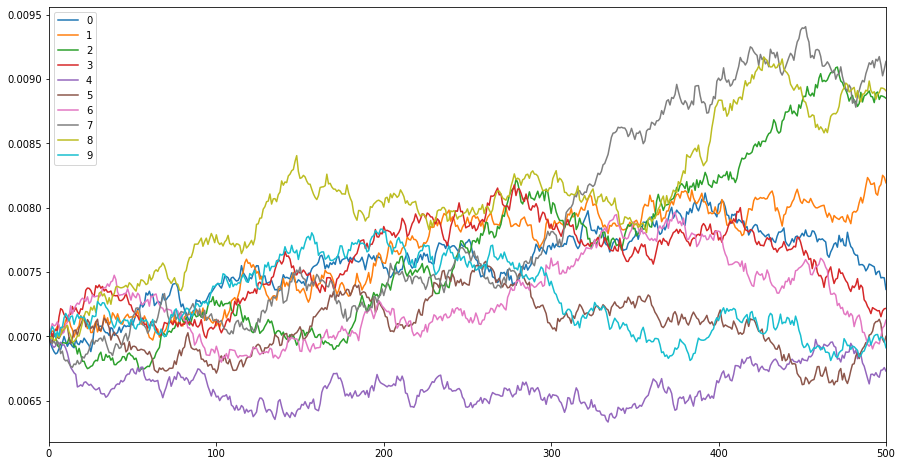

In [51]:
future_currency.iloc[:,:10].plot(figsize=(15,8))
plt.show()

In [52]:
call_value_cur = np.maximum(S_cur[-1]-K_cur , 0)
call_value_cur

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
Call_price_cur = (np.exp(-u*T_cur)*np.sum(call_value_cur))/ iterations_cur
Call_price_cur

1.1099567810145154e-06

## B) Using BSM

In [54]:
def d1_currency(E, K, sd, r_domestic, r_foreign, T):
    return ((np.log(E/(K*np.exp(r_foreign*T)))) + ((r_domestic +(0.5*(sd**2)))*T)) / (sd*(T**0.5))

In [55]:
def d2_currency(E, K, sd, r_domestic, r_foreign, T):
    return ((np.log(E/(K*np.exp(r_foreign*T)))) + ((r_domestic -(0.5*(sd**2)))*T)) / (sd*(T**0.5))

In [56]:
def BSM_currency(E, K, sd, r_domestic, r_foreign, T):
    return np.exp(-r_foreign*T)*((E*norm.cdf(d1_currency(E, K, sd, r_domestic, r_foreign, T))) - (np.exp(-r_domestic*T)*np.exp(r_foreign*T)*K*norm.cdf(d2_currency(E, K, sd, r_domestic, r_foreign, T))))

In [57]:
BSM_currency = BSM_currency(E=E0, K=K_cur, sd=sd_cur, r_domestic=r_domestic, r_foreign=r_foreign, T=T_cur)
BSM_currency

6.797366021106352e-07

## C) BSM vs 3000simulations

In [58]:
diff_cur = Call_price_cur - BSM_currency
diff_cur

4.3022017890388014e-07

In [59]:
pct_diff_cur = diff_cur/BSM_currency
print('%error = ',pct_diff_cur*100,'%')

%error =  63.292189587556834 %


## D) Try 100,000 simulations

In [60]:
np.random.seed(503508)

In [61]:
iterations_cur_2 = 100000

In [62]:
Z_cur_2 = np.random.standard_normal((days_to_maturity_cur+1, iterations_cur_2))
Z_cur_2

array([[-0.82487461, -0.97546241,  0.88384933, ..., -0.75805458,
         0.31141964, -1.52225157],
       [-0.38136394,  0.04500309,  0.20725137, ...,  0.5828356 ,
        -0.39111136, -0.03235513],
       [-0.19501404,  1.85818245, -0.73838639, ...,  0.06541506,
         0.69707757,  1.14083037],
       ...,
       [-0.03494417, -0.81749243,  0.48880815, ..., -1.80272723,
         0.22772882, -0.11847408],
       [ 1.14325341,  1.10530197, -1.28366694, ..., -0.94230322,
        -0.63339362, -0.61015812],
       [ 0.58054708, -0.51697922,  0.61233567, ...,  0.13953308,
        -0.87277618, -0.30027168]])

In [63]:
S_cur_2 = np.zeros_like(Z_cur_2)
S_cur_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
Z_cur_2.shape

(501, 100000)

In [65]:
S_cur_2.shape

(501, 100000)

In [66]:
S_cur_2[0] = E0
S_cur_2

array([[0.007, 0.007, 0.007, ..., 0.007, 0.007, 0.007],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [67]:
for t in range(1,days_to_maturity_cur+1):
    S_cur_2[t] = S_cur_2[t-1]*(np.exp(u_t -(0.5*(sd_t**2)) + (sd_t)*Z_cur_2[t]))

In [68]:
S_cur_2

array([[0.007     , 0.007     , 0.007     , ..., 0.007     , 0.007     ,
        0.007     ],
       [0.00698697, 0.00700206, 0.00700781, ..., 0.00702114, 0.00698663,
        0.00699932],
       [0.00698054, 0.00706867, 0.00698214, ..., 0.00702393, 0.00701178,
        0.0070403 ],
       ...,
       [0.00631969, 0.00659122, 0.00697309, ..., 0.00675077, 0.00783232,
        0.00648816],
       [0.00635677, 0.00662863, 0.00692841, ..., 0.00671911, 0.00780778,
        0.00646859],
       [0.0063759 , 0.00661175, 0.00695037, ..., 0.0067243 , 0.00777389,
        0.0064592 ]])

In [69]:
future_currency_2 = pd.DataFrame(S_cur_2)
future_currency_2

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,...,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000,0.007000
1,0.006987,0.007002,0.007008,0.007018,0.006985,0.006957,0.006995,0.007010,0.007001,0.006995,...,0.007028,0.007025,0.007059,0.007080,0.006998,0.006984,0.007002,0.007021,0.006987,0.006999
2,0.006981,0.007069,0.006982,0.006984,0.006979,0.006890,0.007048,0.007011,0.007015,0.006996,...,0.006977,0.007042,0.007053,0.007075,0.007019,0.006950,0.006970,0.007024,0.007012,0.007040
3,0.007000,0.007021,0.007018,0.007026,0.006943,0.006858,0.007101,0.007021,0.007070,0.007010,...,0.006967,0.007007,0.007063,0.007094,0.007050,0.006982,0.006917,0.007046,0.007015,0.007051
4,0.007041,0.007101,0.007093,0.007035,0.007038,0.006889,0.007109,0.007091,0.007061,0.007050,...,0.007022,0.007051,0.007075,0.007135,0.007058,0.007029,0.006948,0.007069,0.006980,0.007015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.006365,0.006596,0.006984,0.006699,0.007484,0.007161,0.006391,0.006669,0.006673,0.007233,...,0.008203,0.007456,0.008071,0.007475,0.008218,0.007471,0.007832,0.006815,0.007836,0.006451
497,0.006320,0.006618,0.006955,0.006665,0.007451,0.007123,0.006358,0.006689,0.006599,0.007240,...,0.008205,0.007441,0.008067,0.007383,0.008276,0.007525,0.007828,0.006812,0.007823,0.006492
498,0.006320,0.006591,0.006973,0.006700,0.007406,0.007195,0.006326,0.006689,0.006554,0.007283,...,0.008235,0.007475,0.008083,0.007412,0.008277,0.007566,0.007838,0.006751,0.007832,0.006488
499,0.006357,0.006629,0.006928,0.006671,0.007440,0.007182,0.006348,0.006714,0.006518,0.007270,...,0.008151,0.007499,0.008013,0.007421,0.008299,0.007531,0.007924,0.006719,0.007808,0.006469


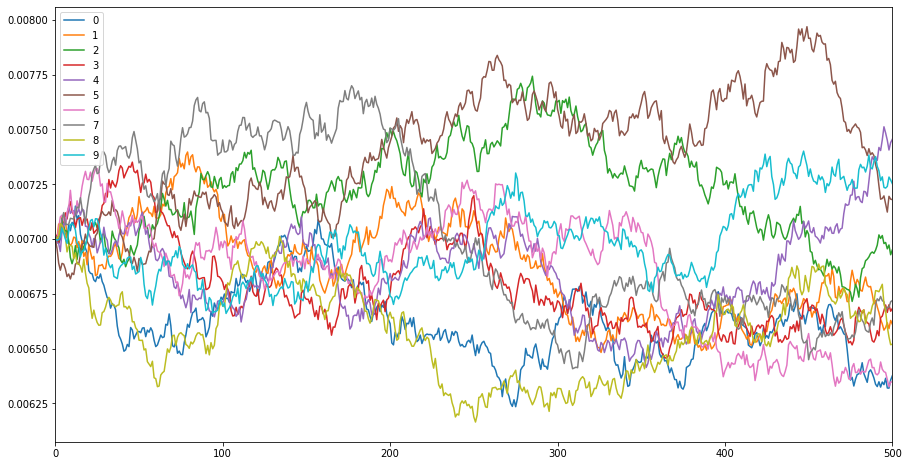

In [70]:
future_currency_2.iloc[:,:10].plot(figsize=(15,8))
plt.show()

In [71]:
call_value_cur_2 = np.maximum(S_cur_2[-1]-K_cur , 0)
Call_price_cur_2 = (np.exp(-u*T_cur)*np.sum(call_value_cur_2))/ iterations_cur_2
Call_price_cur_2

7.345813573449324e-07

In [72]:
call_value_cur_2

array([0., 0., 0., ..., 0., 0., 0.])

In [73]:
np.sum(call_value_cur_2)

0.07645601912454744

## E) BSM vs 100,000simulations

In [74]:
diff_cur_2 = Call_price_cur_2 - BSM_currency
diff_cur_2

5.484475523429717e-08

In [75]:
pct_diff_cur_2 = diff_cur_2/BSM_currency
print('%error = ',pct_diff_cur_2*100,'%')

%error =  8.068530525500602 %
